In [54]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [55]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [56]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [57]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [58]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [59]:
# View all of the classes that automap found
Measurement = Base.classes.measurement

In [60]:
# Save references to each table
Station = Base.classes.station

In [61]:
inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [62]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [64]:
for row in session.query(Measurement, Measurement.date).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x0000021A7611E7C0>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x0000021A7611E850>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x0000021A7611E520>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x0000021A7611E550>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x0000021A7611E370>, '2010-01-06')


In [65]:
# Find the most recent date in the data set.
results = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).all()
print(results) 

[('2017-08-23',), ('2017-08-23',), ('2017-08-23',), ('2017-08-23',), ('2017-08-22',), ('2017-08-22',), ('2017-08-22',), ('2017-08-21',), ('2017-08-21',), ('2017-08-21',), ('2017-08-21',), ('2017-08-20',), ('2017-08-20',), ('2017-08-20',), ('2017-08-19',), ('2017-08-19',), ('2017-08-19',), ('2017-08-19',), ('2017-08-18',), ('2017-08-18',), ('2017-08-18',), ('2017-08-18',), ('2017-08-17',), ('2017-08-17',), ('2017-08-17',), ('2017-08-17',), ('2017-08-16',), ('2017-08-16',), ('2017-08-16',), ('2017-08-16',), ('2017-08-15',), ('2017-08-15',), ('2017-08-15',), ('2017-08-15',), ('2017-08-15',), ('2017-08-14',), ('2017-08-14',), ('2017-08-14',), ('2017-08-14',), ('2017-08-14',), ('2017-08-13',), ('2017-08-13',), ('2017-08-13',), ('2017-08-13',), ('2017-08-13',), ('2017-08-12',), ('2017-08-12',), ('2017-08-12',), ('2017-08-11',), ('2017-08-11',), ('2017-08-11',), ('2017-08-11',), ('2017-08-10',), ('2017-08-10',), ('2017-08-10',), ('2017-08-10',), ('2017-08-09',), ('2017-08-09',), ('2017-08-09'

In [66]:
#Another way to find it
MaxDate = session.query(func.max(Measurement.date)).all()
print(MaxDate)

[('2017-08-23',)]


In [67]:
import datetime as dt

In [68]:
Maxi = MaxDate[0]

In [69]:
Maxi

('2017-08-23',)

In [70]:
Maxi[0]

'2017-08-23'

In [71]:
from datetime import datetime
a=datetime.strptime(Maxi[0], '%Y-%m-%d').date()

In [72]:
a

datetime.date(2017, 8, 23)

In [73]:
Yearago = a - dt.timedelta(days=365)

In [74]:
Yearago

datetime.date(2016, 8, 23)

In [75]:
Yearagostr=Yearago.strftime('%Y-%m-%d')

In [76]:
Yearagostr

'2016-08-23'

In [77]:
YearDates = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).\
filter(Measurement.date >= Yearagostr).all()



In [78]:
for row in YearDates:
    print (row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11'

In [79]:
Long = len(YearDates)

In [80]:
df = pd.DataFrame(YearDates[::], columns=['date', 'prep'])
df.set_index('date', inplace=True, )
df = df.sort_index ()
df.head(10)

,prep
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,0.05
2016-08-24,1.45
2016-08-24,2.15


In [81]:
len(df)

2230

In [82]:
Data = df.dropna()

In [83]:
Data.index.unique()

Index(['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27',
       '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01',
       ...
       '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23'],
      dtype='object', name='date', length=366)

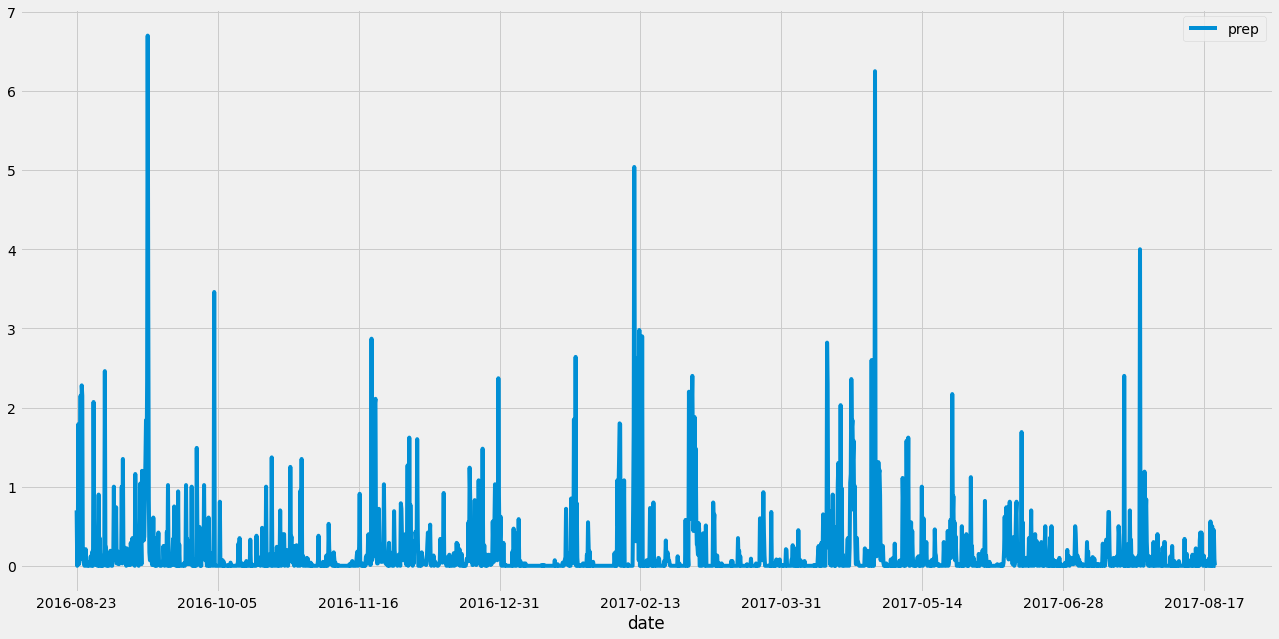

In [84]:
ax= Data.plot(figsize=(20, 10))
plt.show()

In [85]:
Res = Data.prep.agg(["mean","median","var","std","sem"])

In [86]:
Res

mean      0.177279
median    0.020000
var       0.212696
std       0.461190
sem       0.010259
Name: prep, dtype: float64

In [87]:
Howmanyst = session.query(Station).count()


In [88]:
Howmanyst

9

In [89]:
results2 = session.query(Station.station,Station.name).\
    order_by(Station.station.desc()).all()
print(results2) 

[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'), ('USC00519397', 'WAIKIKI 717.2, HI US'), ('USC00519281', 'WAIHEE 837.5, HI US'), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'), ('USC00517948', 'PEARL CITY, HI US'), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US'), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'), ('USC00513117', 'KANEOHE 838.1, HI US'), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')]


# Exploratory Station Analysis

In [90]:
Sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(Sta)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [91]:
Counttemp = session.query(func.count(Measurement.tobs)).filter_by(station="USC00519281").all()
Maxtemp = session.query(func.max(Measurement.tobs)).filter_by(station="USC00519281").all()
Mintemp = session.query(func.min(Measurement.tobs)).filter_by(station="USC00519281").all()
Avgtemp = session.query(func.avg(Measurement.tobs)).filter_by(station="USC00519281").all()

In [92]:
[Counttemp[0][0]]

[2772]

In [93]:
Counttemp = Counttemp[0]
Maxtemp = Maxtemp[0]
Mintemp = Mintemp[0]
Avgtemp = Avgtemp[0]

In [94]:
print(f'Number of temperatures for station USC00519281: {Counttemp[0]}')
print(f'Max temperature for station USC00519281: {Maxtemp[0]}')
print(f'Min temperature for station USC00519281: {Mintemp[0]}')
print(f'Average of temperatures for station USC00519281: {Avgtemp[0]}')

Number of temperatures for station USC00519281: 2772
Max temperature for station USC00519281: 85.0
Min temperature for station USC00519281: 54.0
Average of temperatures for station USC00519281: 71.66378066378067


In [95]:

Yearagostation = session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.date >= Yearagostr).filter_by(station="USC00519281").all()


In [96]:
len(Yearagostation)

352

In [97]:
df2 = pd.DataFrame(Yearagostation[::], columns=['date','tobs'])
df2.set_index('date', inplace=True, )
df2 = df2.sort_index ()
df2.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


In [98]:
len(df2)

352

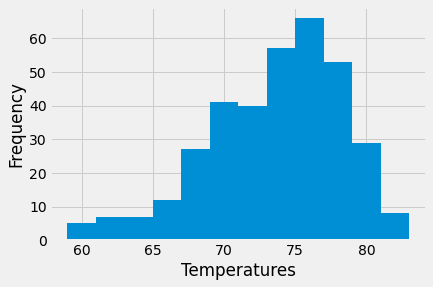

In [99]:
plt.hist(df2.tobs,bins=12)
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.show()

# Close session

In [100]:
# Close Session
session.close()